In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',60000)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_colwidth',200)
pd.options.display.float_format = '{:,.2f}'.format

### Machine Learning Project Walkthrough: Data Cleaning
Prepare data on loans for predictive modeling.

### 1. Introduction

In this course, we will walk through the full data science life cycle, from data cleaning and feature selection to machine learning. We will focus on credit modelling, a well known data science problem that focuses on modeling a borrower's credit risk. Credit has played a key role in the economy for centuries and some form of credit has existed since the beginning of commerce. We'll be working with financial lending data from Lending Club. Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. You can read more about their marketplace here.

Each borrower fills out a comprehensive application, providing their past financial history, the reason for the loan, and more. Lending Club evaluates each borrower's credit score using past historical data (and their own data science process!) and assign an interest rate to the borrower. The interest rate is the percent in addition to the requested loan amount the borrower has to pay back. You can read more about the interest rate that Lending Club assigns here. Lending Club also tries to verify each piece of information the borrower provides but it can't always verify all of the information (usually for regulation reasons).

A higher interest rate means that the borrower is riskier and more unlikely to pay back the loan while a lower interest rate means that the borrower has a good credit history is more likely to pay back the loan. The interest rates range from 5.32% all the way to 30.99% and each borrower is given a grade according to the interest rate they were assigned. If the borrower accepts the interest rate, then the loan is listed on the Lending Club marketplace.

Investors are primarily interested in receiving a return on their investments. Approved loans are listed on the Lending Club website, where qualified investors can browse recently approved loans, the borrower's credit score, the purpose for the loan, and other information from the application. Once they're ready to back a loan, they select the amount of money they want to fund. Once a loan's requested amount is fully funded, the borrower receives the money they requested minus the origination fee that Lending Club charges.

The borrower then makes monthly payments back to Lending Club either over 36 months or over 60 months. Lending Club redistributes these payments to the investors. This means that investors don't have to wait until the full amount is paid off before they see a return in money. If a loan is fully paid off on time, the investors make a return which corresponds to the interest rate the borrower had to pay in addition to the requested amount. Many loans aren't completely paid off on time, however, and some borrowers default on the loan.

Here's a diagram from Bible Money Matters that sums up the process:

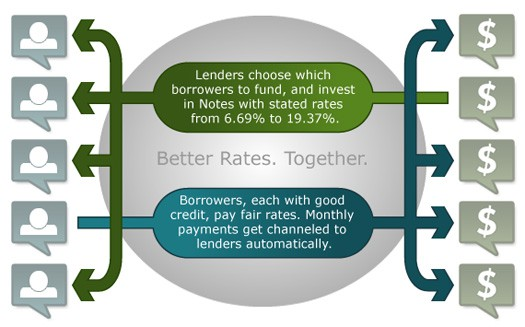

While Lending Club has to be extremely savvy and rigorous with their credit modelling, investors on Lending Club need to be equally as savvy about determining which loans are more likely to be paid off. While at first, you may wonder why investors would put money into anything but low interest loans. The incentive investors have to back higher interest loans is, well, the higher interest! If investors believe the borrower can pay back the loan, even if he or she has a weak financial history, then investors can make more money through the larger additional amount the borrower has to pay.

Most investors use a portfolio strategy to invest small amounts in many loans, with healthy mixes of low, medium, and interest loans. In this course, we'll focus on the mindset of a conservative investor who only wants to invest in the loans that have a good chance of being paid off on time. To do that, we'll need to first understand the features in the dataset and then experiment with building machine learning models that reliably predict if a loan will be paid off or not.

### 2. Introduction to the data

In [2]:
data_dict = pd.read_csv('datasets/LCDataDictionary.xlsx - LoanStats.csv')

In [3]:
data_dict.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


Lending Club releases data for all of the approved and declined loan applications periodically on their website. You can select a few different year ranges to download the datasets (in CSV format) for both approved and declined loans.

You'll also find a data dictionary (in XLS format) which contains information on the different column names towards the bottom of the page. We recommend downloading the data dictionary to so you can refer to it whenever you want to learn more about what a column represents in the datasets. Here's a link to the data dictionary file hosted on Google Drive.

Before diving into the datasets themselves, let's get familiar with the data dictionary. The LoanStats sheet describes the approved loans datasets and the RejectStats describes the rejected loans datasets. Since rejected applications don't appear on the Lending Club marketplace and aren't available for investment, we'll be focusing on data on approved loans only.

The approved loans datasets contain information on current loans, completed loans, and defaulted loans. Let's now define the problem statement for this machine learning project:

<b>Can we build a machine learning model that can accurately predict if a borrower will pay off their loan on time or not?</b>

Before we can start doing machine learning, we need to define what features we want to use and which column represents the target column we want to predict. Let's start by reading in the dataset and exploring it.

### Problem Statement: Can we build a machine learning model that can accurately predict if a borrower will pay off their loan on time or not?

### 3. Reading in to Pandas

In this mission, we'll focus on approved loans data from 2007 to 2011, since a good number of the loans have already finished. In the datasets for later years, many of the loans are current and still being paid off.

We have reduced the size of the dataset to make it easier to work with, by:

- removing the desc column:
    - which contains a long text explanation for each loan
- removing the url column:
    - which contains a link to each loan on Lending Club which can only be accessed with an investor account
- removing all columns containing more than 50% missing values:
    - which allows us to move faster since we can spend less time trying to fill these values


First things first, let's read in the dataset into a Dataframe so we can start to explore the data and explore the remaining features.

In [4]:
loans_2007 = pd.read_csv('datasets/loans_2007.csv', low_memory = False)

In [5]:
loans_2007.tail(2) 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
42536,Total amount funded in policy code 1: 471701350,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,nan
42537,Total amount funded in policy code 2: 0,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,nan


Various ways to drop the last two lines: 

In [6]:
#loans_2007 = loans_2007[:-2] #drop bottom 2 quickly

#loans_2007.drop(loans_2007.tail(2).index,inplace=True) 

loans_2007.drop(loans_2007.iloc[-2:,].index, inplace = True) 

In [7]:
print(loans_2007.head(1))

        id    member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501 1,296,599.00   5,000.00     5,000.00         4,975.00   36 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   

   annual_inc verification_status   issue_d loan_status pymnt_plan  \
0   24,000.00            Verified  Dec-2011  Fully Paid          n   

       purpose     title zip_code addr_state   dti  delinq_2yrs  \
0  credit_card  Computer    860xx         AZ 27.65         0.00   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0         Jan-1985            1.00      3.00     0.00  13,648.00      83.7%   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0       9.00                   f       0.00           0.00     5,863.16   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0         5,833.84  

In [8]:
print(loans_2007.shape[1]) #52 columns to clean!!! 

52


In [9]:
loans_2007.id.unique()

array(['1077501', '1077430', '1077175', ..., '72176', '71623', '70686'],
      dtype=object)

In [10]:
loans_2007.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42536 entries, 0 to 42535
Data columns (total 52 columns):
id                            42536 non-null object
member_id                     42535 non-null float64
loan_amnt                     42535 non-null float64
funded_amnt                   42535 non-null float64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_title                     39909 non-null object
emp_length                    41423 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
issue_d                       42535 non-null object
loan_status                   42535 non-null object
p

In [11]:
loans_2007.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,"42,535.00","42,535.00","42,535.00","42,535.00","42,535.00","42,531.00","42,535.00","42,506.00","42,506.00","42,506.00","42,506.00","42,535.00","42,506.00","42,535.00","42,535.00","42,535.00","42,535.00","42,535.00","42,535.00","42,535.00","42,535.00","42,535.00","42,535.00","42,390.00","42,535.00","42,506.00","42,390.00","42,506.00","41,170.00","42,430.00"
mean,"825,702.55","11,089.72","10,821.59","10,139.83",322.62,"69,136.56",13.37,0.15,1.08,9.34,0.06,"14,297.86",22.12,37.99,37.82,"11,978.62","11,271.70","9,639.04","2,238.31",1.51,99.76,13.86,"2,610.76",0.00,1.00,0.00,0.00,0.14,0.05,0.00
std,"279,540.91","7,410.94","7,146.91","7,131.69",208.93,"64,096.35",6.73,0.51,1.53,4.50,0.25,"22,018.44",11.59,303.21,302.21,"9,014.85","8,956.62","7,051.03","2,579.81",7.81,716.22,159.36,"4,385.64",0.00,0.00,0.01,0.00,29.36,0.21,0.00
min,"70,473.00",500.00,500.00,0.00,15.67,"1,896.00",0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,"638,479.50","5,200.00","5,000.00","4,950.00",165.52,"40,000.00",8.20,0.00,0.00,6.00,0.00,"3,635.00",13.00,0.00,0.00,"5,460.84","4,790.81","4,400.00",657.10,0.00,0.00,0.00,211.46,0.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,"824,178.00","9,700.00","9,600.00","8,500.00",277.69,"59,000.00",13.47,0.00,1.00,9.00,0.00,"8,821.00",20.00,0.00,0.00,"9,676.34","8,949.13","8,000.00","1,339.16",0.00,0.00,0.00,526.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,"1,033,946.50","15,000.00","15,000.00","14,000.00",428.18,"82,500.00",18.68,0.00,2.00,12.00,0.00,"17,251.00",29.00,0.00,0.00,"16,386.48","15,491.76","13,250.00","2,802.94",0.00,0.00,0.00,"3,165.45",0.00,1.00,0.00,0.00,0.00,0.00,0.00
max,"1,314,167.00","35,000.00","35,000.00","35,000.00","1,305.19","6,000,000.00",29.99,13.00,33.00,47.00,5.00,"1,207,359.00",90.00,"5,794.29","5,794.29","58,563.68","58,563.68","35,000.02","23,611.10",209.00,"29,623.35","7,002.19","36,115.20",0.00,1.00,1.00,0.00,"6,053.00",2.00,1.00


### 4. First group of columns
The Dataframe contains many columns and can be cumbersome to try to explore all at once. Let's break up the columns into 3 groups of 18 columns and use the data dictionary to become familiar with what each column represents. As you understand each feature, you want to pay attention to any features that:

- leak information from the future (after the loan has already been funded)
- don't affect a borrower's ability to pay back a loan (e.g. a randomly generated ID value by Lending Club)
- formatted poorly and need to be cleaned up
- require more data or a lot of processing to turn into a useful feature
- contain redundant information<br>

We need to especially pay attention to data leakage, since it can cause our model to overfit. This is because the model would be using data about the target column that wouldn't be available when we're using the model on future loans. We encourage you to spend as much time as you need to understand each column, because a poor understanding could cause you to make mistakes in the data analysis and modeling process. As you go through the dictionary, keep in mind that we need to select one of the columns as the target column we want to use when we move on to the machine learning phase.

In this screen and the next few screens, let's focus on just columns that we need to remove from consideration. Then, we can circle back and further dissect the columns we decided to keep.

To make this process easier, we created a table that contains the name, data type, first row's value, and description from the data dictionary for the first 18 rows.

### creating a table reference - taking from column, type, first values and description

In [12]:
def create_table (df,data_dict):
    
    base_1 = pd.DataFrame(df.dtypes, columns = ['dtype'])
    base_1.index.name = 'name'
    first_value_col = pd.DataFrame(df.iloc[0])
    first_value_col.columns = ['first_value']

    base_2 = pd.merge(base_1,first_value_col, how = 'left',left_index = True, right_index = True).reset_index(drop=False)
    dd_map  = data_dict

    table = pd.merge(base_2,dd_map,how = 'left',
                  left_on = 'name', right_on = 'LoanStatNew').drop(axis=1,columns ='LoanStatNew')
    table.index = np.arange(1, len(base_2) + 1)
    return table

In [13]:
table_ref = create_table(loans_2007,data_dict) #run the function 
table_ref[:19] #display first 19 of the description 

,name,dtype,first_value,Description
1,id,object,1077501,A unique LC assigned ID for the loan listing.
2,member_id,float64,"1,296,599.00",A unique LC assigned Id for the borrower member.
3,loan_amnt,float64,"5,000.00","The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
4,funded_amnt,float64,"5,000.00",The total amount committed to that loan at that point in time.
5,funded_amnt_inv,float64,"4,975.00",The total amount committed by investors for that loan at that point in time.
6,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
7,int_rate,object,10.65%,Interest Rate on the loan
8,installment,float64,162.87,The monthly payment owed by the borrower if the loan originates.
9,grade,object,B,LC assigned loan grade
10,sub_grade,object,B2,LC assigned loan subgrade


After analyzing each column, we can conclude that the following features need to be removed:

- id: randomly generated field by Lending Club for unique identification purposes only
- member_id: also a randomly generated field by Lending Club for unique identification purposes only
- funded_amnt: leaks data from the future (after the loan is already started to be funded)
- funded_amnt_inv: also leaks data from the future (after the loan is already started to be funded)
- grade: contains redundant information as the interest rate column (int_rate)
- sub_grade: also contains redundant information as the interest rate column (int_rate)
- emp_title: requires other data and a lot of processing to potentially be useful
- issue_d: leaks data from the future (after the loan is already completely funded)

Recall that Lending Club assigns a grade and a sub-grade based on the borrower's interest rate. While the grade and sub_grade values are categorical, <b>the int_rate column contains continuous values, which are better suited for machine learning.</b>

Let's now drop these columns from the Dataframe before moving onto the next group of columns.

### 5. First group of columns

In [14]:
to_drop = ["id", "member_id", "funded_amnt", "funded_amnt_inv", 
            "grade", "sub_grade", "emp_title", "issue_d"]

loans_2007 = loans_2007.drop(axis=1, columns = to_drop)

In [15]:
loans_2007.shape # 8 columns dropped! sanity check 

(42536, 44)

### 6. Second group of features
Let's now look at the next 18 columns:

In [16]:
table_ref[19:37]

,name,dtype,first_value,Description
20,title,object,Computer,The loan title provided by the borrower
21,zip_code,object,860xx,The first 3 numbers of the zip code provided by the borrower in the loan application.
22,addr_state,object,AZ,The state provided by the borrower in the loan application
23,dti,float64,27.65,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly inc..."
24,delinq_2yrs,float64,0.00,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
25,earliest_cr_line,object,Jan-1985,The month the borrower's earliest reported credit line was opened
26,inq_last_6mths,float64,1.00,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
27,open_acc,float64,3.00,The number of open credit lines in the borrower's credit file.
28,pub_rec,float64,0.00,Number of derogatory public records
29,revol_bal,float64,"13,648.00",Total credit revolving balance


Within this group of columns, we need to drop the following columns:

- zip_code: redundant with the addr_state column since only the first 3 digits of the 5 digit zip code are visible (which only can be used to identify the state the borrower lives in)
- out_prncp: leaks data from the future, (after the loan already started to be paid off)
- out_prncp_inv: also leaks data from the future, (after the loan already started to be paid off)
- total_pymnt: also leaks data from the future, (after the loan already started to be paid off)
- total_pymnt_inv: also leaks data from the future, (after the loan already started to be paid off)
- total_rec_prncp: also leaks data from the future, (after the loan already started to be paid off)

The out_prncp and out_prncp_inv both describe the outstanding principal amount for a loan, which is the remaining amount the borrower still owes. These 2 columns as well as the total_pymnt column describe properties of the loan after it's fully funded and started to be paid off. This information isn't available to an investor before the loan is fully funded and we don't want to include it in our model.

Let's go ahead and remove these columns from the Dataframe.

### 7. Second group of features

In [17]:
loans_2007 = loans_2007.drop(["zip_code", "out_prncp", "out_prncp_inv", 
                              "total_pymnt", "total_pymnt_inv", "total_rec_prncp"], axis=1)

### 8. Third group of features
Let's now move on to the last group of features:

In [18]:
table_ref[37:]

,name,dtype,first_value,Description
38,total_rec_int,float64,863.16,Interest received to date
39,total_rec_late_fee,float64,0.00,Late fees received to date
40,recoveries,float64,0.00,post charge off gross recovery
41,collection_recovery_fee,float64,0.00,post charge off collection fee
42,last_pymnt_d,object,Jan-2015,Last month payment was received
43,last_pymnt_amnt,float64,171.62,Last total payment amount received
44,last_credit_pull_d,object,Jun-2016,The most recent month LC pulled credit for this loan
45,collections_12_mths_ex_med,float64,0.00,Number of collections in 12 months excluding medical collections
46,policy_code,float64,1.00,publicly available policy_code=1\nnew products not publicly available policy_code=2
47,application_type,object,INDIVIDUAL,Indicates whether the loan is an individual application or a joint application with two co-borrowers


In the last group of columns, we need to drop the following columns:

- total_rec_int: leaks data from the future, (after the loan already started to be paid off),
- total_rec_late_fee: also leaks data from the future, (after the loan already started to be paid off),
- recoveries: also leaks data from the future, (after the loan already started to be paid off),
- collection_recovery_fee: also leaks data from the future, (after the loan already started to be paid off),
- last_pymnt_d: also leaks data from the future, (after the loan already started to be paid off),
- last_pymnt_amnt: also leaks data from the future, (after the loan already started to be paid off).

All of these columns leak data from the future, meaning that they're describing aspects of the loan after it's already been fully funded and started to be paid off by the borrower.

### 9. Third group of features

In [19]:
loans_2007 = loans_2007.drop(["total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], axis=1)
print(loans_2007.iloc[0])
print(loans_2007.shape[1])

name
loan_amnt                        5,000.00
term                            36 months
int_rate                           10.65%
installment                        162.87
emp_length                      10+ years
home_ownership                       RENT
annual_inc                      24,000.00
verification_status              Verified
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
title                            Computer
addr_state                             AZ
dti                                 27.65
delinq_2yrs                          0.00
earliest_cr_line                 Jan-1985
inq_last_6mths                       1.00
open_acc                             3.00
pub_rec                              0.00
revol_bal                       13,648.00
revol_util                          83.7%
total_acc                            9.00
initial_list_status                     f
last_credit_pull_d           

### 10. Target column

Just by becoming familiar with the columns in the dataset, we were able to reduce the number of columns from 52 to 32 columns. We now need to decide on a target column that we want to use for modeling.

We should use the loan_status column, since it's the only column that directly describes if a loan was paid off on time, had delayed payments, or was defaulted on the borrower. Currently, this column contains text values and we need to convert it to a numerical one for training a model. Let's explore the different values in this column and come up with a strategy for converting the values in this column.

- Use the Series method value_counts to return the frequency of the unique values in the loan_status column.
- Display the frequency of each unique value using the print function.

In [20]:
print(loans_2007['loan_status'].value_counts())

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64


### 11. Binary classification

In [21]:
loans_2007.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [22]:
bass_1 = pd.DataFrame(loans_2007.loan_status.value_counts()).reset_index()\
.sort_values(by='loan_status', ascending = False)

In [23]:
bass_1.loc[bass_1['index']=='Fully Paid','Meaning']  = 'Loan has been fully paid off.'
bass_1.loc[bass_1['index']=='Charged Off','Meaning']  = 'Loan for which there is no longer a reasonable expectation of further payments.'
bass_1.loc[bass_1['index']=='Does not meet the credit policy. Status:Fully Paid','Meaning']  = 'While the loan was paid off, the loan application today would no longer meet the credit policy and wouldnt be approved on to the marketplace.'
bass_1.loc[bass_1['index']=='Current','Meaning']  = 'Loan is up to date on current payments.'
bass_1.loc[bass_1['index']=='Does not meet the credit policy. Status:Charged Off','Meaning']  = 'While the loan was charged off, the loan application today would no longer meet the credit policy and wouldnt be approved on to the marketplace.'
bass_1.loc[bass_1['index']=='Late (31-120 days)','Meaning']  = 'Loan hasnt been paid in 31 to 120 days (late on the current payment).'
bass_1.loc[bass_1['index']=='In Grace Period','Meaning']  = 'The loan is past due but still in the grace period of 15 days'
bass_1.loc[bass_1['index']=='Late (16-30 days)','Meaning']  = 'Loan hasnt been paid in 16 to 30 days (late on the current payment)'
bass_1.loc[bass_1['index']=='Default','Meaning']  = 'Loan is defaulted on and no payment has been made for more than 121 days.'

There are 8 different possible values for the loan_status column. You can read about most of the different loan statuses on the Lending Clube webste. The two values that start with "Does not meet the credit policy" aren't explained unfortunately. A quick Google search takes us to explanations from the lending community here.

We've compiled the explanation for each column as well as the counts in the Dataframe in the following table:

In [24]:
bass_1

,index,loan_status,Meaning
0,Fully Paid,33136,Loan has been fully paid off.
1,Charged Off,5634,Loan for which there is no longer a reasonable expectation of further payments.
2,Does not meet the credit policy. Status:Fully Paid,1988,"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldnt be approved on to the marketplace."
3,Current,961,Loan is up to date on current payments.
4,Does not meet the credit policy. Status:Charged Off,761,"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldnt be approved on to the marketplace."
5,Late (31-120 days),24,Loan hasnt been paid in 31 to 120 days (late on the current payment).
6,In Grace Period,20,The loan is past due but still in the grace period of 15 days
7,Late (16-30 days),8,Loan hasnt been paid in 16 to 30 days (late on the current payment)
8,Default,3,Loan is defaulted on and no payment has been made for more than 121 days.


From the investor's perspective, we're interested in trying to predict which loans will be paid off on time and which ones won't be. Only the Fully Paid and Charged Off values describe the final outcome of the loan. The other values describe loans that are still ongoing and where the jury is still out on if the borrower will pay back the loan on time or not. While the Default status resembles the Charged Off status, in Lending Club's eyes, loans that are charged off have essentially no chance of being repaid while default ones have a small chance. You can read about the difference here.

Since we're interested in being able to predict which of these 2 values a loan will fall under, we can treat the problem as a binary classification one. Let's remove all the loans that don't contain either Fully Paid and Charged Off as the loan's status and then transform the Fully Paid values to 1 for the positive case and the Charged Off values to 0 for the negative case. While there are a few different ways to transform all of the values in a column, we'll use the Dataframe method replace. According to the documentation, we can pass the replace method a nested mapping dictionary in the following format:

Lastly, one thing we need to keep in mind is the <b>class imbalance </b> between the positive and negative cases. While there are 33,136 loans that have been fully paid off, there are only 5,634 that were charged off. This class imbalance is a common problem in binary classification and during training, the model ends up having a strong bias towards predicting the class with more observations in the training set and will rarely predict the class with less observations. The stronger the imbalance, the more biased the model becomes. There are a few different ways to tackle this class imbalance, which we'll explore later.

In [25]:
loans_2007 = loans_2007[(loans_2007['loan_status'] == "Fully Paid") | (loans_2007['loan_status'] == "Charged Off")]

status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}

loans_2007 = loans_2007.replace(status_replace)

### 13. Removing single value columns

To wrap up this mission, let's look for any columns that contain only one unique value and remove them. These columns won't be useful for the model since they don't add any information to each loan application. In addition, removing these columns will reduce the number of columns we'll need to explore further in the next mission.

We'll need to compute the number of unique values in each column and drop the columns that contain only one unique value. While the Series method unique returns the unique values in a column, it also counts the Pandas missing value object nan as a value:

Since we're trying to find columns that contain one true unique value, we should first drop the null values then compute the number of unique values:

- Remove any columns from loans_2007 that contain only one unique value:
    - Create an empty list, drop_columns to keep track of which columns you want to drop
    - For each column:
        - Use the Series method dropna to remove any null values and then use the Series method unique to return the set of non-null unique values
        - Use the len() function to return the number of values in that set
        - Append the column to drop_columns if it contains only 1 unique value
    - Use the Dataframe method drop to remove the columns in drop_columns from loans_2007
    - Use the print function to display drop_columns so we know which ones were removed
    
When using the drop method, don't forget to set the axis parameter to 1 to drop columns using the input column names.

In [27]:
orig_columns = loans_2007.columns
drop_columns = []

for col in orig_columns:
    col_series = loans_2007[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
        
loans_2007 = loans_2007.drop(drop_columns, axis=1)
print(drop_columns)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


It looks we were able to remove 9 more columns since they only contained 1 unique value.

In this mission, we started to become familiar with the columns in the dataset and removed many columns that aren't useful for modeling. We also selected our target column and decided to focus our modeling efforts on binary classification. In the next mission, we'll explore the individual features in greater depth and work towards training our first machine learning model.